In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))


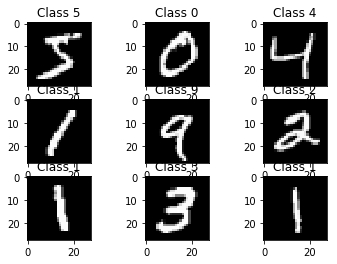

In [3]:
%matplotlib inline

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
# SELU based activation. very similar useage as RELU. no dropout.

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('selu')) 
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('selu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [8]:
model.fit(X_train, Y_train, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.3699     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.2035     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.1423     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.1196     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.1064     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0937     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0864     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.0798     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0722     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.0700     


In [9]:
score = model.evaluate(X_test, Y_test)
score

 9216/10000 [==========================>...] - ETA: 0s

0.081480191320957962

In [10]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9504/10000 [===========================>..] - ETA: 0s

In [11]:
correct_indices

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [12]:
incorrect_indices

array([  18,   96,  149,  151,  247,  259,  449,  495,  578,  582,  619,
        659,  684,  717,  874,  877,  944,  947,  951,  956,  965, 1014,
       1039, 1069, 1112, 1156, 1166, 1182, 1226, 1232, 1247, 1290, 1299,
       1319, 1328, 1337, 1393, 1425, 1464, 1476, 1494, 1500, 1522, 1530,
       1531, 1549, 1609, 1678, 1681, 1709, 1717, 1721, 1790, 1878, 1901,
       1911, 2004, 2040, 2044, 2052, 2053, 2070, 2093, 2098, 2109, 2118,
       2153, 2182, 2272, 2280, 2293, 2308, 2329, 2387, 2393, 2405, 2406,
       2414, 2422, 2454, 2488, 2534, 2607, 2618, 2635, 2648, 2654, 2705,
       2720, 2743, 2758, 2863, 2877, 2896, 2915, 2921, 2939, 2952, 2953,
       3030, 3062, 3073, 3117, 3202, 3289, 3384, 3405, 3422, 3475, 3503,
       3520, 3558, 3559, 3662, 3727, 3767, 3776, 3780, 3808, 3818, 3838,
       3853, 3893, 3906, 3941, 3943, 3985, 3995, 4065, 4075, 4093, 4116,
       4176, 4193, 4199, 4248, 4289, 4306, 4369, 4425, 4437, 4439, 4443,
       4497, 4528, 4536, 4601, 4635, 4671, 4690, 47

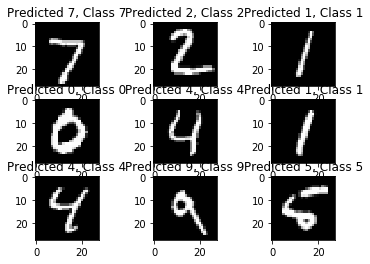

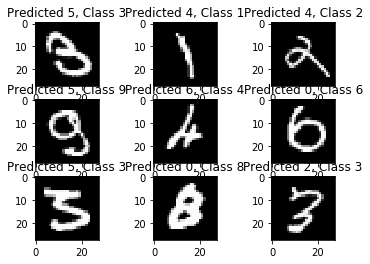

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))